<a href="https://colab.research.google.com/github/slashman413/py_examples/blob/main/FinLab_Python_%E6%96%B0%E6%89%8B%E6%95%99%E5%AD%B8_part3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance > log.txt

In [ ]:
import yfinance as yf
import pandas as pd
import io

def crawl_world_index():
    url = "https://finance.yahoo.com/world-indices/"
    response = requests.get(url)
    f = io.StringIO(response.text)
    dfs = pd.read_html(f)
    return dfs[0]

def crawl_price(stock_id):
  df = yf.Ticker(stock_id).history(period="max")
  return df

world_index = crawl_world_index()

In [ ]:
import time

world_index_history = {}
for symbol, name in zip(world_index['Symbol'], world_index['Name']):

    print(name)

    world_index_history[name] = crawl_price(symbol)
    time.sleep(5)

S&P 500
Dow 30
Nasdaq
NYSE COMPOSITE (DJ)
NYSE AMEX COMPOSITE INDEX
Cboe UK 100
Russell 2000
CBOE Volatility Index
FTSE 100
DAX PERFORMANCE-INDEX
CAC 40
ESTX 50 PR.EUR
Euronext 100 Index
BEL 20
MOEX Russia Index
Nikkei 225
HANG SENG INDEX
SSE Composite Index
Shenzhen Index
STI Index
S&P/ASX 200
ALL ORDINARIES
S&P BSE SENSEX
Jakarta Composite Index
FTSE Bursa Malaysia KLCI
S&P/NZX 50 INDEX GROSS
KOSPI Composite Index
TSEC weighted index
S&P/TSX Composite index
IBOVESPA
IPC MEXICO
S&P/CLX IPSA
MERVAL
TA-125
EGX 30 Price Return Index
Top 40 USD Net TRI Index


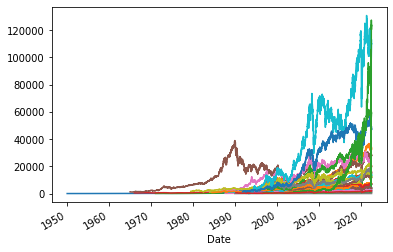

In [ ]:
for name, history in world_index_history.items():
    history.Close.plot()

# Python 新手教學 part4

In [ ]:
print(world_index_history['S&P 500'].head())

             Open   High    Low  Close   Volume  Dividends  Stock Splits
Date                                                                    
1950-01-03  16.66  16.66  16.66  16.66  1260000          0             0
1950-01-04  16.85  16.85  16.85  16.85  1890000          0             0
1950-01-05  16.93  16.93  16.93  16.93  2550000          0             0
1950-01-06  16.98  16.98  16.98  16.98  2010000          0             0
1950-01-09  17.08  17.08  17.08  17.08  2520000          0             0


In [ ]:
close = {}
for name, price in world_index_history.items():
    if len(price) != 0:
        close[name] = price['Close']

close = pd.DataFrame(close)
close = close.resample('1d').last().dropna(how='all', axis=1).dropna(how='all', axis=0)

close.head()

,S&P 500,Dow 30,Nasdaq,NYSE COMPOSITE (DJ),NYSE AMEX COMPOSITE INDEX,Cboe UK 100,Russell 2000,CBOE Volatility Index,FTSE 100,DAX PERFORMANCE-INDEX,...,KOSPI Composite Index,TSEC weighted index,S&P/TSX Composite index,IBOVESPA,IPC MEXICO,S&P/CLX IPSA,MERVAL,TA-125,EGX 30 Price Return Index,Top 40 USD Net TRI Index
Date,,,,,,,,,,,,,,,,,,,,,
1950-01-03,16.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-04,16.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-05,16.93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-06,16.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-09,17.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
corr = close.corr()
print(corr)

                            S&P 500    Dow 30    Nasdaq  NYSE COMPOSITE (DJ)  \
S&P 500                    1.000000  0.992836  0.977297             0.971442   
Dow 30                     0.992836  1.000000  0.966205             0.973100   
Nasdaq                     0.977297  0.966205  1.000000             0.901933   
NYSE COMPOSITE (DJ)        0.971442  0.973100  0.901933             1.000000   
NYSE AMEX COMPOSITE INDEX  0.757177  0.792999  0.699722             0.880742   
Cboe UK 100                0.612511  0.662270  0.517422             0.733308   
Russell 2000               0.976965  0.983250  0.950826             0.970075   
CBOE Volatility Index     -0.017499 -0.015213  0.002844            -0.062137   
FTSE 100                   0.829442  0.811055  0.718665             0.923445   
DAX PERFORMANCE-INDEX      0.959947  0.964485  0.914348             0.977540   
CAC 40                     0.795302  0.769736  0.723841             0.854200   
ESTX 50 PR.EUR             0.616766  0.6

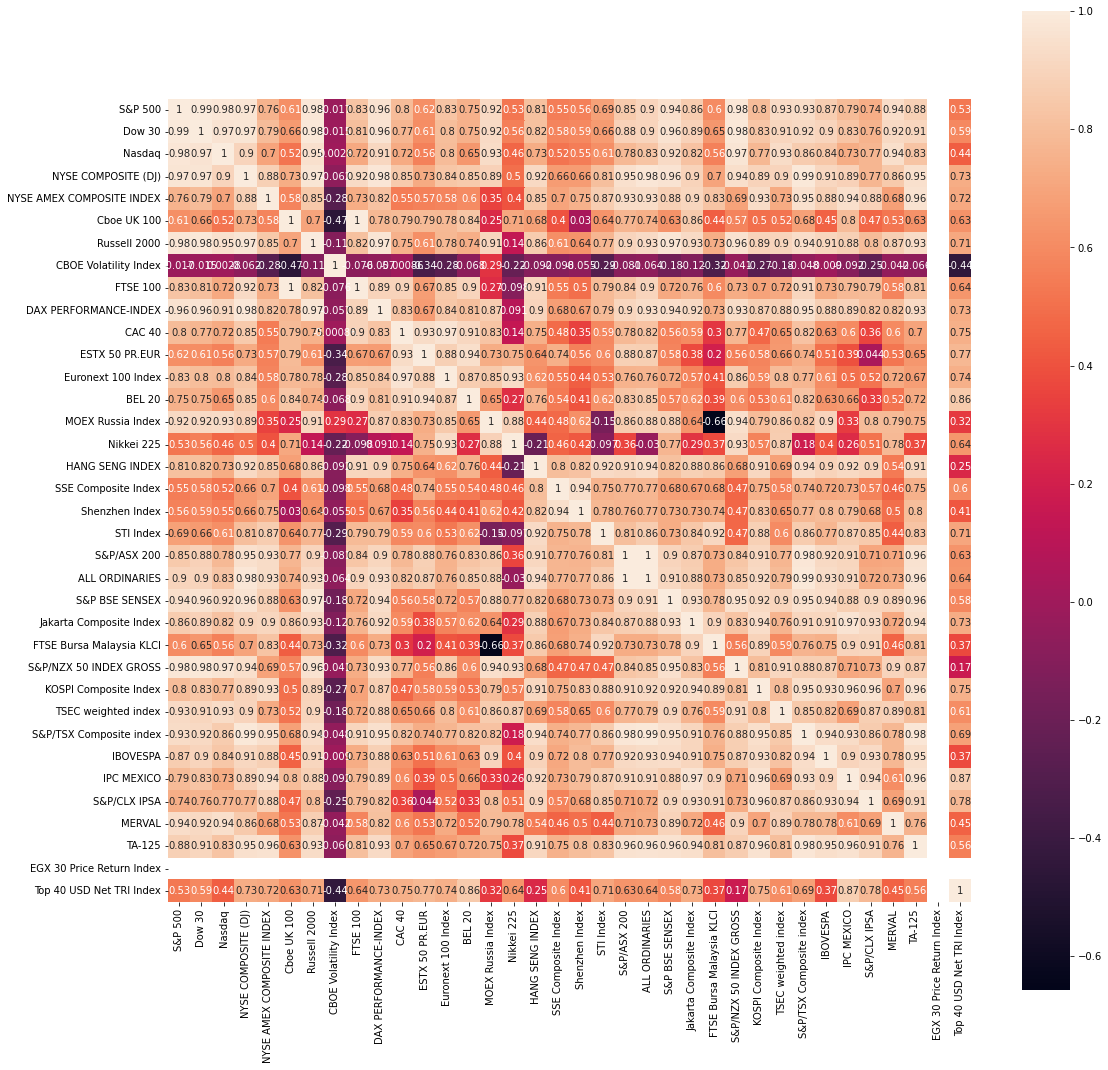

In [ ]:
# set figure size
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18, 18)

# original code
import seaborn as sns
sns.heatmap(corr, square=True ,vmax=1.0, linecolor='white', annot=True)

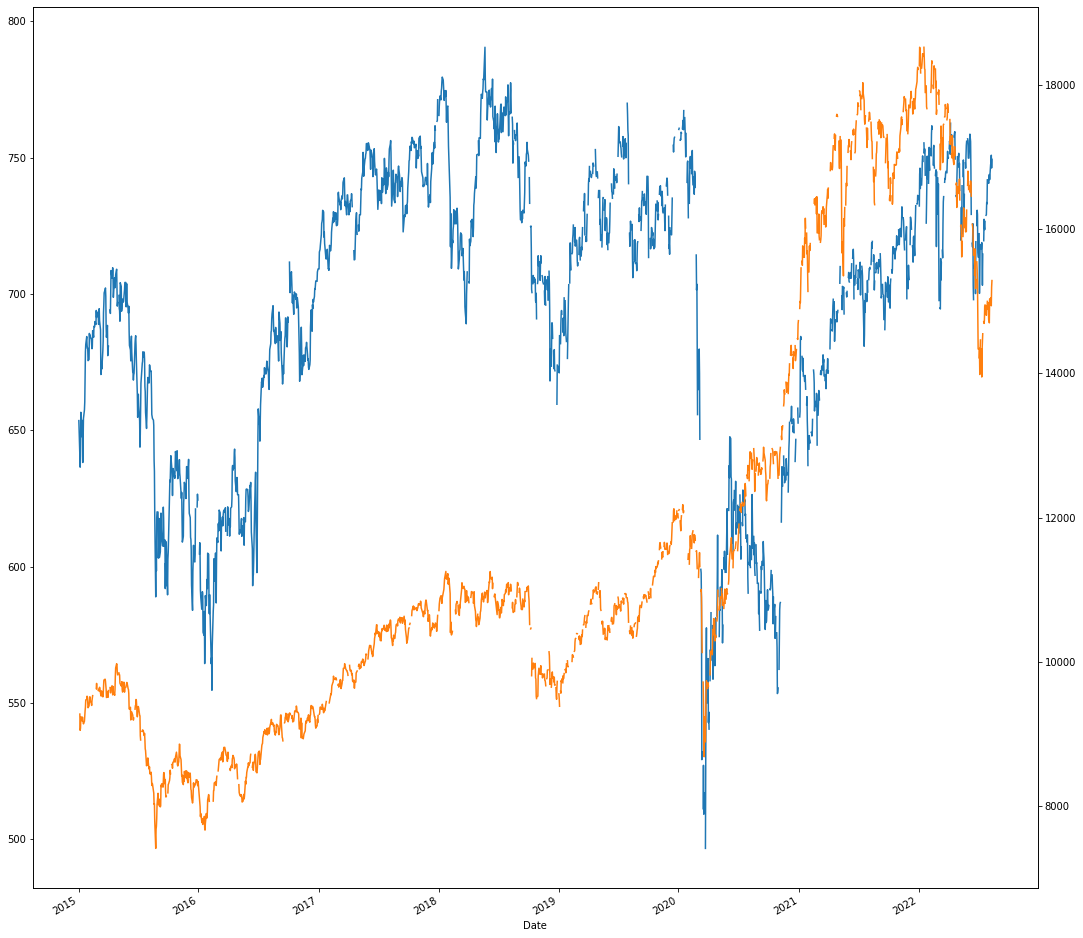

In [ ]:
close['Cboe UK 100']['2015':].plot()
close['TSEC weighted index']['2015':].plot(secondary_y=True)

# FinLab Python 新手教學 part5

## 計算每日漲跌

In [ ]:
pct_change = close.pct_change()
profit = pct_change.mean()
profit.sort_values()

EGX 30 Price Return Index    0.000000
ESTX 50 PR.EUR               0.000073
FTSE Bursa Malaysia KLCI     0.000120
Euronext 100 Index           0.000121
Cboe UK 100                  0.000141
TSEC weighted index          0.000163
Top 40 USD Net TRI Index     0.000191
BEL 20                       0.000202
STI Index                    0.000214
CAC 40                       0.000236
MOEX Russia Index            0.000242
S&P/ASX 200                  0.000243
SSE Composite Index          0.000253
FTSE 100                     0.000254
S&P/TSX Composite index      0.000266
ALL ORDINARIES               0.000276
NYSE COMPOSITE (DJ)          0.000277
Nikkei 225                   0.000280
Shenzhen Index               0.000295
S&P/CLX IPSA                 0.000297
KOSPI Composite Index        0.000314
HANG SENG INDEX              0.000339
S&P 500                      0.000340
Dow 30                       0.000347
NYSE AMEX COMPOSITE INDEX    0.000348
Russell 2000                 0.000353
S&P/NZX 50 I

## 計算風險

In [ ]:
risk = pct_change.std()

## 計算報酬率

In [ ]:
sharpe = profit / risk * (252 ** 0.5)
sharpe.sort_values()

ESTX 50 PR.EUR               0.083186
Euronext 100 Index           0.150132
FTSE Bursa Malaysia KLCI     0.160417
Top 40 USD Net TRI Index     0.183887
TSEC weighted index          0.198926
Cboe UK 100                  0.231117
MERVAL                       0.249330
MOEX Russia Index            0.271829
SSE Composite Index          0.278019
CAC 40                       0.280605
BEL 20                       0.284441
Shenzhen Index               0.284947
STI Index                    0.298093
KOSPI Composite Index        0.310147
HANG SENG INDEX              0.347084
Nikkei 225                   0.363265
FTSE 100                     0.376284
S&P/ASX 200                  0.406529
Russell 2000                 0.425909
Jakarta Composite Index      0.435835
DAX PERFORMANCE-INDEX        0.438142
NYSE COMPOSITE (DJ)          0.440148
S&P/TSX Composite index      0.442577
ALL ORDINARIES               0.458060
NYSE AMEX COMPOSITE INDEX    0.495242
TA-125                       0.506930
Dow 30      

## 計算 sharpe ratio

In [ ]:
sharpe = profit / risk * (252 ** 0.5)
sharpe.sort_values()

ESTX 50 PR.EUR               0.083186
Euronext 100 Index           0.150132
FTSE Bursa Malaysia KLCI     0.160417
Top 40 USD Net TRI Index     0.183887
TSEC weighted index          0.198926
Cboe UK 100                  0.231117
MERVAL                       0.249330
MOEX Russia Index            0.271829
SSE Composite Index          0.278019
CAC 40                       0.280605
BEL 20                       0.284441
Shenzhen Index               0.284947
STI Index                    0.298093
KOSPI Composite Index        0.310147
HANG SENG INDEX              0.347084
Nikkei 225                   0.363265
FTSE 100                     0.376284
S&P/ASX 200                  0.406529
Russell 2000                 0.425909
Jakarta Composite Index      0.435835
DAX PERFORMANCE-INDEX        0.438142
NYSE COMPOSITE (DJ)          0.440148
S&P/TSX Composite index      0.442577
ALL ORDINARIES               0.458060
NYSE AMEX COMPOSITE INDEX    0.495242
TA-125                       0.506930
Dow 30      

## 移動窗格 sharpe ratio

In [ ]:
# before
profit = pct_change.mean()
risk = pct_change.std()
sharpe = profit / risk * (252 ** 0.5)

# after
profit = pct_change.rolling(252).mean()
risk = pct_change.rolling(252).std()
sharpe = profit / risk * (252 ** 0.5)

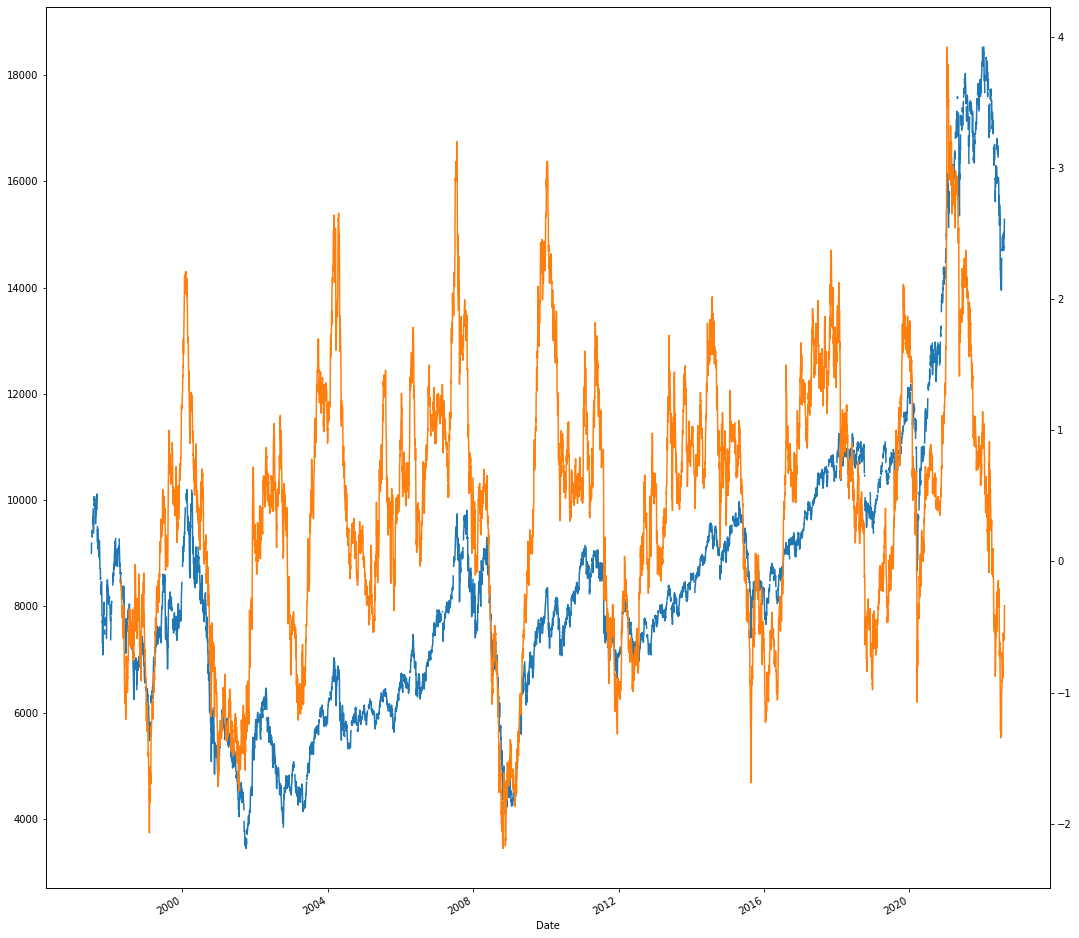

In [ ]:
close['TSEC weighted index'].plot()
sharpe['TSEC weighted index'].plot(secondary_y=True)